### Multivariate Linear Regression Task
- 구매자의 연수입(Annual Salary)과 순자산(자산 - 부채, Net Worth), 신용카드 부채(Credit Card Debt)를 통해 다변량 회귀 분석 진행

In [1]:
import pandas as pd
import numpy as np
c_df = pd.read_csv('./datasets/car_purchasing.csv')
c_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [2]:
columns = list(c_df.columns[c_df.dtypes != object])
columns

['Gender',
 'Age',
 'Annual Salary',
 'Credit Card Debt',
 'Net Worth',
 'Car Purchase Amount']

In [3]:
pre_c_df = c_df[columns]
pre_c_df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [4]:
pre_c_df.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Salary'}>,
        <Axes: title={'center': 'Credit Card Debt'}>],
       [<Axes: title={'center': 'Net Worth'}>,
        <Axes: title={'center': 'Car Purchase Amount'}>]], dtype=object)

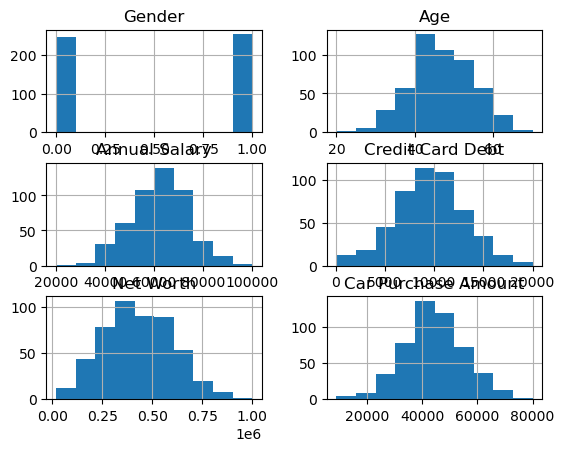

In [5]:
pre_c_df.hist()

In [6]:
pre_c_df = pre_c_df.drop(labels=['Gender'], axis = 1)

In [7]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1,1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1,1)

W = torch.zeros((4,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W,b], lr=1e-12)

epochs = 150000

for epoch in range(1, epochs+1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H)**2)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(),W[3].item(), b.item(), loss.item()))

10000/150000: W1: 0.0013, W2: 0.5078, W3: 0.0480, W4: 0.0283, b: 0.0000, loss: 45532368.0000
20000/150000: W1: 0.0022, W2: 0.5101, W3: 0.0312, W4: 0.0283, b: 0.0000, loss: 45503216.0000
30000/150000: W1: 0.0032, W2: 0.5119, W3: 0.0185, W4: 0.0283, b: -0.0000, loss: 45486700.0000
40000/150000: W1: 0.0041, W2: 0.5132, W3: 0.0091, W4: 0.0283, b: -0.0000, loss: 45477340.0000
50000/150000: W1: 0.0051, W2: 0.5142, W3: 0.0019, W4: 0.0283, b: -0.0000, loss: 45471984.0000
60000/150000: W1: 0.0061, W2: 0.5149, W3: -0.0035, W4: 0.0284, b: -0.0000, loss: 45468928.0000
70000/150000: W1: 0.0070, W2: 0.5155, W3: -0.0075, W4: 0.0284, b: -0.0000, loss: 45467156.0000
80000/150000: W1: 0.0080, W2: 0.5160, W3: -0.0106, W4: 0.0284, b: -0.0000, loss: 45466108.0000
90000/150000: W1: 0.0090, W2: 0.5163, W3: -0.0128, W4: 0.0284, b: -0.0000, loss: 45465476.0000
100000/150000: W1: 0.0099, W2: 0.5165, W3: -0.0146, W4: 0.0284, b: -0.0000, loss: 45465076.0000
110000/150000: W1: 0.0109, W2: 0.5167, W3: -0.0158, W4: 

In [8]:
H = sum(w * X_test[:, i].view(-1, 1) for w, i in zip(W, range(4)))
loss = torch.mean((y_test - H) ** 2)
print(loss.item())
print(np.sqrt(loss.item()))

44922072.0
6702.393005486921


In [9]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split


features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1,1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1,1)

l_r  = Linear(4,1)


optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 150000

for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

10000/150000: W1: 0.0870, W2: 0.5090, W3: 0.0388, W4: 0.0283, b: 0.3547, loss: 45507276.0000
20000/150000: W1: 0.0880, W2: 0.5110, W3: 0.0242, W4: 0.0283, b: 0.3547, loss: 45485444.0000
30000/150000: W1: 0.0890, W2: 0.5126, W3: 0.0133, W4: 0.0283, b: 0.3547, loss: 45473064.0000
40000/150000: W1: 0.0900, W2: 0.5137, W3: 0.0051, W4: 0.0283, b: 0.3547, loss: 45466024.0000
50000/150000: W1: 0.0909, W2: 0.5146, W3: -0.0011, W4: 0.0283, b: 0.3547, loss: 45462000.0000
60000/150000: W1: 0.0919, W2: 0.5152, W3: -0.0057, W4: 0.0284, b: 0.3547, loss: 45459696.0000
70000/150000: W1: 0.0929, W2: 0.5157, W3: -0.0092, W4: 0.0284, b: 0.3547, loss: 45458340.0000
80000/150000: W1: 0.0938, W2: 0.5161, W3: -0.0119, W4: 0.0284, b: 0.3547, loss: 45457540.0000
90000/150000: W1: 0.0948, W2: 0.5164, W3: -0.0139, W4: 0.0284, b: 0.3547, loss: 45457044.0000
100000/150000: W1: 0.0958, W2: 0.5166, W3: -0.0153, W4: 0.0284, b: 0.3547, loss: 45456720.0000
110000/150000: W1: 0.0967, W2: 0.5167, W3: -0.0164, W4: 0.0284,

In [10]:
H = sum(w * X_test[:, i].view(-1, 1) for w, i in zip(list(l_r.parameters())[0][0], range(4)))
loss = torch.mean((y_test - H) ** 2)
print(loss.item())
print(np.sqrt(loss.item()))

44914124.0
6701.800056701184


In [11]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(4,1)

    def forward(self, x):
        return self.linear(x)

In [12]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split


features, targets = pre_c_df.iloc[:,:-1], pre_c_df.iloc[:,-1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1,1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1,1)

l_r  = LinearRegressionModel()


optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 150000

for epoch in range(1, epochs+1):
    H = l_r(X_train)
    loss = mse_loss(y_train, H)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

10000/150000: W1: 0.0478, W2: 0.5305, W3: -0.1152, W4: 0.0285, b: 0.4870, loss: 45593512.0000
20000/150000: W1: 0.0488, W2: 0.5272, W3: -0.0915, W4: 0.0285, b: 0.4870, loss: 45535856.0000
30000/150000: W1: 0.0498, W2: 0.5247, W3: -0.0737, W4: 0.0285, b: 0.4870, loss: 45503220.0000
40000/150000: W1: 0.0507, W2: 0.5229, W3: -0.0604, W4: 0.0285, b: 0.4870, loss: 45484748.0000
50000/150000: W1: 0.0517, W2: 0.5215, W3: -0.0503, W4: 0.0284, b: 0.4870, loss: 45474264.0000
60000/150000: W1: 0.0527, W2: 0.5204, W3: -0.0427, W4: 0.0284, b: 0.4870, loss: 45468284.0000
70000/150000: W1: 0.0536, W2: 0.5196, W3: -0.0371, W4: 0.0284, b: 0.4870, loss: 45464872.0000
80000/150000: W1: 0.0546, W2: 0.5190, W3: -0.0328, W4: 0.0284, b: 0.4870, loss: 45462900.0000
90000/150000: W1: 0.0556, W2: 0.5186, W3: -0.0296, W4: 0.0284, b: 0.4870, loss: 45461740.0000
100000/150000: W1: 0.0565, W2: 0.5182, W3: -0.0271, W4: 0.0284, b: 0.4870, loss: 45461044.0000
110000/150000: W1: 0.0575, W2: 0.5180, W3: -0.0253, W4: 0.0

In [13]:
H = sum(w * X_test[:, i].view(-1, 1) for w, i in zip(list(l_r.parameters())[0][0], range(4)))
loss = torch.mean((y_test - H) ** 2)
print(loss.item())
print(np.sqrt(loss.item()))

44923324.0
6702.486404312955


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W1: {:.4f}, W2: {:.4f},W3: {:.4f},W4: {:.4f}, b: {:.4f}'.format(l_r.coef_[0],l_r.coef_[1],l_r.coef_[2],l_r.coef_[3], l_r.intercept_))

W1: 839.4740, W2: 0.5611,W3: 0.0077,W4: 0.0289, b: -42002.8280


In [15]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), 
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 56987.2571, RMSE loss: 238.7200
